211.14984972852636


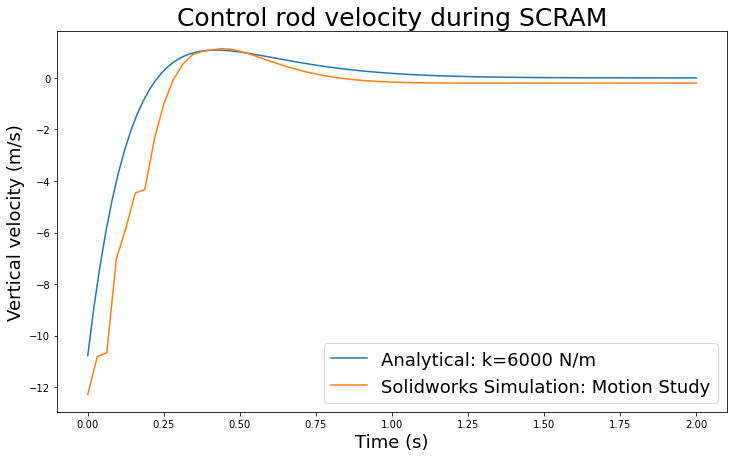

2138.5756346502876


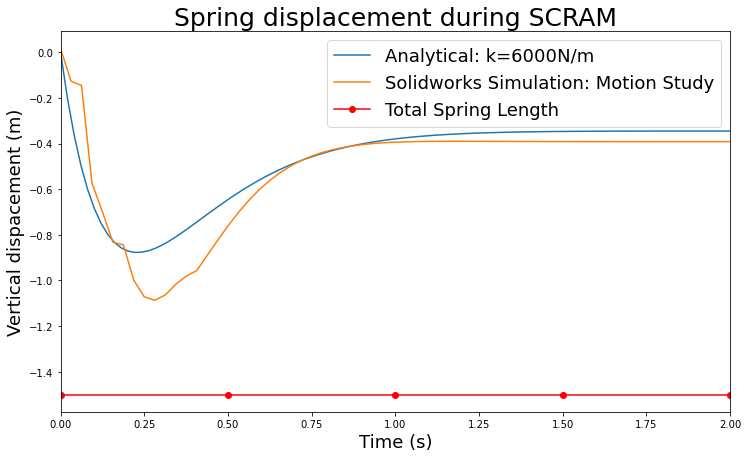

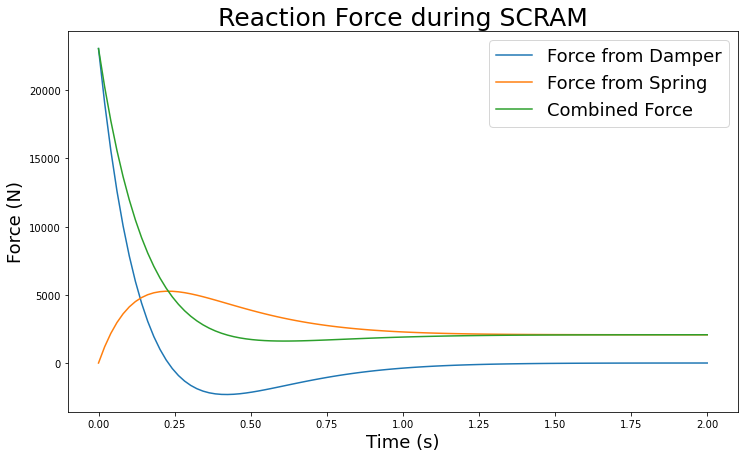

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas 

#Constants
g = 9.81

#Mass of the control rod 
ri = 0.0675
ro = 0.075
length = 9
density = 2520 #kg/m3 = (g/cm3)*1000
mass = (ro**2-ri**2)*length*density*np.pi + 135
mass2 = 26.5 #mass of deceleration ring 
print(mass)
k = [6000]
plt.figure(figsize=(12,7))
for i in k: 
    #Velocity of control rod at bottom after fall
    fall_height = 7.5
    zeta = 0.95
    k= i #N/m
    #v1 = np.sqrt(2*g*fall_height)
    v1=0 # initial downward velocity
    velocity_bottom = -np.sqrt(v1**2+2*g*fall_height)
    velocity_combined = (mass*velocity_bottom)/(mass+mass2)
    
    #Particular solution 
    Xp = (g*mass)/k

    #Equations
    c = zeta*2*np.sqrt(k*mass)
    #c = 6000
    time = np.linspace(0,2,100)
    Natural_freq = np.sqrt(k/(mass))
    Damped_freq = Natural_freq*np.sqrt(1-zeta**2)
    A1 = Xp
    A2 = (velocity_combined+zeta*Natural_freq*A1)/Damped_freq
    Displacement = (np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+A2*np.sin(Damped_freq*time)) - Xp
    
    Velocity = -zeta*Natural_freq*(np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+
                A2*np.sin(Damped_freq*time))+ (np.e**(-zeta*Natural_freq*time))*(-Damped_freq*A1*np.sin(Damped_freq*time)+
                                                             Damped_freq*A2*np.cos(Damped_freq*time))
    
    df = pandas.read_csv('velocity.csv',delimiter=',')
    x = df.iloc[0:]
    x = x.drop(axis=0, columns='Time (sec)')
    time3 = np.linspace(0,2,len(x[25:90]))
    plt.plot(time,Velocity,label='Analytical: k=6000 N/m')
    plt.plot(time3,x[25:90]-0.2,label='Solidworks Simulation: Motion Study')
    plt.xlabel('Time (s)',size=18)
    plt.ylabel('Vertical velocity (m/s)',size=18)
    plt.title('Control rod velocity during SCRAM',size=25)
    plt.legend(loc=4,fontsize=18)
    plt.show()
    plt.figure(figsize=(12,7))
    plt.plot(time,Displacement,label='Analytical: k='+str(k)+'N/m')
    print(c)
    
df = pandas.read_csv('displacement.csv',delimiter=',')
x = df.iloc[0:]
x = x.drop(axis=0, columns='Time (sec)')
time2 = np.linspace(0,2,len(x[25:90]))
plt.plot(time2,x[25:90]-1.5,label='Solidworks Simulation: Motion Study')
plt.plot(np.linspace(0,2.5,6),np.linspace(-1.5,-1.5,6),c='r',marker='o',label='Total Spring Length')
plt.xlabel('Time (s)',size=18)
plt.ylabel('Vertical dispacement (m)',size=18)
plt.title('Spring displacement during SCRAM',size=25)
plt.xlim(0,2)
plt.legend(loc=1,fontsize=18)
plt.show()

plt.figure(figsize=(12,7))
plt.plot(time,-Velocity*c,label='Force from Damper')
plt.plot(time,-Displacement*k,label='Force from Spring')
combined = -Displacement*k -Velocity*c
plt.plot(time,combined,label = 'Combined Force')
plt.xlabel('Time (s)',size=18)
plt.ylabel('Force (N)',size=18)
plt.title('Reaction Force during SCRAM',size=25)
plt.legend(loc=1, prop={'size': 18})
plt.show()

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas 

#Constants
g = 9.81

#Mass of the control rod 
ri = 0.0675
ro = 0.075
length = 9
density = 2520 #kg/m3 = (g/cm3)*1000
mass = (ro**2-ri**2)*length*density*np.pi + 145
mass2 = 8 #mass of the top of the spring system 

#k = [3000,4500,6000,7500,9000]

def k_function(a): 
    #Velocity of control rod at bottom after fall
    fall_height = 7.5
    zeta = 0.95
    k= a #N/m
    #v1 = np.sqrt(2*g*fall_height)
    v1=0 # initial downward velocity
    velocity_bottom = -np.sqrt(v1**2+2*g*fall_height)
    velocity_combined = (mass*velocity_bottom)/(mass+mass2)

    #Particular solution 
    Xp = (g*mass)/k

    #Equations
    c = zeta*2*np.sqrt(k*mass)
    #c = 6000
    time = np.linspace(0,2,100)
    Natural_freq = np.sqrt(k/(mass))
    Damped_freq = Natural_freq*np.sqrt(1-zeta**2)
    A1 = Xp
    A2 = (velocity_combined+zeta*Natural_freq*A1)/Damped_freq
    Displacement = (np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+A2*np.sin(Damped_freq*time)) - Xp

    Velocity = -zeta*Natural_freq*(np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+
                A2*np.sin(Damped_freq*time))+ (np.e**(-zeta*Natural_freq*time))*(-Damped_freq*A1*np.sin(Damped_freq*time)+
                                                             Damped_freq*A2*np.cos(Damped_freq*time))


    return min(Displacement) 


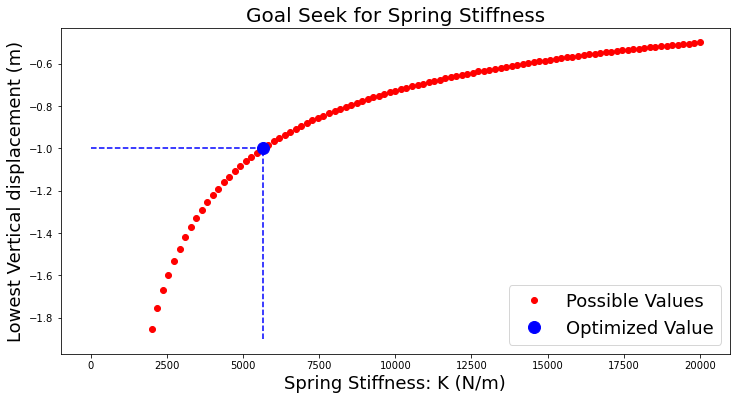

In [4]:
plt.figure(figsize=(12,6))
for i in np.linspace(2000,20000,100):
    #print(i,k_function(i))
    plt.scatter(i,k_function(i),c='r')
plt.plot(5657,-1,'o', color='r',label='Possible Values')
plt.plot(5657,-1,'o', color='b', markersize=12,label='Optimized Value')
plt.plot(np.linspace(5657,5657,20),np.linspace(-1.9,-1,20),'--',c='b')
plt.plot(np.linspace(0,5657,20),np.linspace(-1,-1,20),'--',c='b')
plt.xlabel('Spring Stiffness: K (N/m)',size=18)
plt.ylabel('Lowest Vertical displacement (m)',size=18)
plt.title('Goal Seek for Spring Stiffness',size=20)
plt.legend(loc=4, prop={'size': 18})
plt.show()

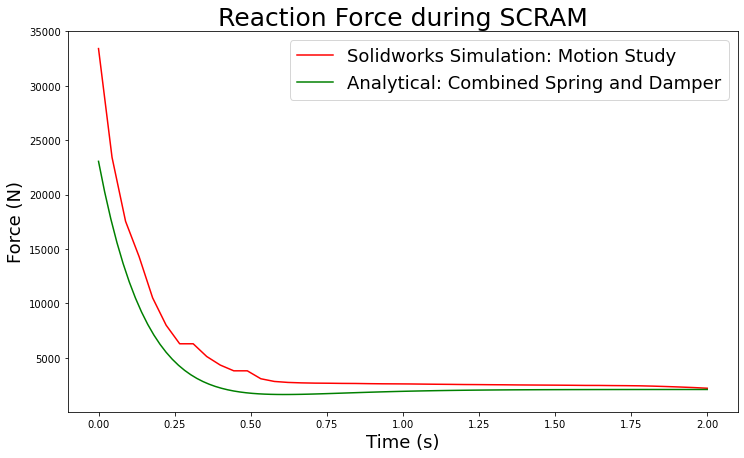

In [5]:
import pandas
from matplotlib import pyplot as plt
import numpy as np

df = pandas.read_csv('Reaction_Force2.csv')[4:50]
plt.figure(figsize=(12,7))
time = np.linspace(0,2,len(df))
plt.plot(time,df.iloc[:,1],label='Solidworks Simulation: Motion Study',c='r')
time = np.linspace(0,2,100)
plt.plot(time,combined,label='Analytical: Combined Spring and Damper',c='g')
plt.xlabel('Time (s)',size=18)
plt.ylabel('Force (N)',size=18)
plt.title('Reaction Force during SCRAM',size=25)
plt.legend(loc=1, prop={'size': 18})
plt.show()

10.524250993960006
10.524250993960006
10.524250993960006


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


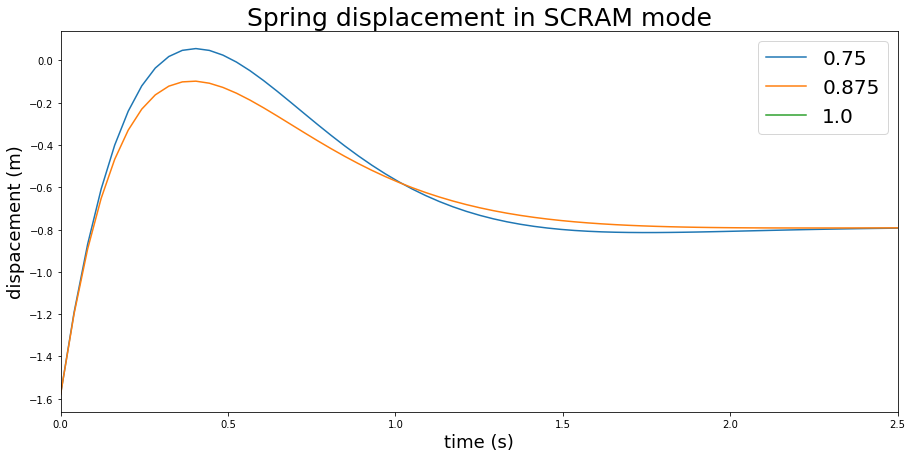

In [152]:
#Constants
g = 9.81
zeta1 = np.linspace(0.75,1,3)

#Mass of the control rod 
ri = 0.0675
ro = 0.075
length = 9
density = 2520 #kg/m3 = (g/cm3)*1000
mass = (ro**2-ri**2)*length*density*np.pi
mass2 = 20 #mass of the top of the spring system 

plt.figure(figsize=(15,7))
for i in zeta1: 
    zeta = i
    #k-value changes for the air spring system 
    n = 1.4
    A = np.pi*0.1**2
    P0 = 43000
    h=2
    
    k = (n*P0*A**2)/(A*h)
    
    #Velocity of control rod at bottom after fall
    fall_height = 9
    #v1 = np.sqrt(2*g*fall_height)
    v1=0 # initial downward velocity
    velocity_bottom = np.sqrt(v1**2+2*g*fall_height)
    velocity_combined = (mass*velocity_bottom)/(mass+mass2)

    #Particular solution 
    Xp = (g*mass)/k

    #Equations
    c = zeta*2*np.sqrt(k*mass)
    time = np.linspace(0,4,100)
    Natural_freq = np.sqrt(k/mass)
    Damped_freq = Natural_freq*np.sqrt(1-zeta**2)
    A1 = - Xp
    A2 = (velocity_combined+zeta*Natural_freq*A1)/Damped_freq
    Displacement = (np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+A2*np.sin(Damped_freq*time)) - Xp
    plt.plot(time,Displacement,label=i)
    print(velocity_combined)

plt.xlabel('time (s)',size=18)
plt.ylabel('dispacement (m)',size=18)
plt.title('Spring displacement in SCRAM mode',size=25)
plt.xlim(0,2.5)
plt.legend(loc=1,fontsize=20)
plt.show()

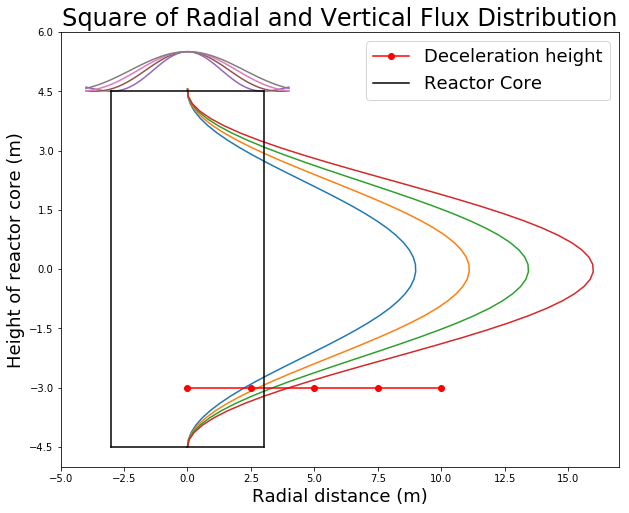

In [159]:
#Neutron Flux
def Flux(H,Z,C):
    return C*np.cos((np.pi*Z)/H)
def radial(A,R,r):
    return A*scipy.special.j0((2.405*r)/R)

#Vertical Flux
distance = np.linspace(-4.5,4.55,50)
plt.figure(figsize=(10,8))
for i in np.linspace(3,4,4):
    plt.plot((Flux(9,distance,i))**2,distance)

#Radial Flux 
r=np.linspace(-4,4,100)
for i in np.linspace(3,5,4):
    plt.plot(r,(radial(1,i,r)**2+4.5))
plt.xlabel('Radial distance (m)',size=18)
plt.ylabel('Height of reactor core (m)',size=18)
plt.title('Square of Axial Flux Distribution',size=20)
plt.ylim(-5,5)
plt.yticks(np.linspace(-4.5,6,8))
plt.plot(np.linspace(0,10,5),np.linspace(-3,-3,5),c='r',label="Deceleration height", marker='o')

#Core plot
plt.plot(np.linspace(3,3,100),np.linspace(-4.5,4.5,100),c='black',label='Reactor Core')
plt.plot(np.linspace(-3,-3,100),np.linspace(-4.5,4.5,100),c='black')
plt.plot(np.linspace(-3,3,100),np.linspace(4.5,4.5,100),c='black')
plt.plot(np.linspace(-3,3,100),np.linspace(-4.5,-4.5,100),c='black')

#plt.plot(np.linspace(-2.5,2.5,100),np.linspace(4.5,4.5,100),c='r')
plt.xlabel('Radial distance (m)',size=18)
plt.ylabel('Height of reactor core (m)',size=18)
plt.title('Square of Radial and Vertical Flux Distribution',size=24)
plt.legend(fontsize=18)
plt.show()

In [130]:
ri = 0.0675
ro = 0.075
length = 9
density = 2520 #kg/m3 = (g/cm3)*1000
mass = (ro**2-ri**2)*length*density*np.pi
impact_distance = 1.5
height = 7.5 

Area = (ro**2)*np.pi
Force = (mass*height*g)/impact_distance

stress = Force/Area
print(stress)

211366.2599999999


In [ ]:
#Power

torque =9.81*76.5*0.15 #g*mass*radius in N/m
power = 

In [161]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.special

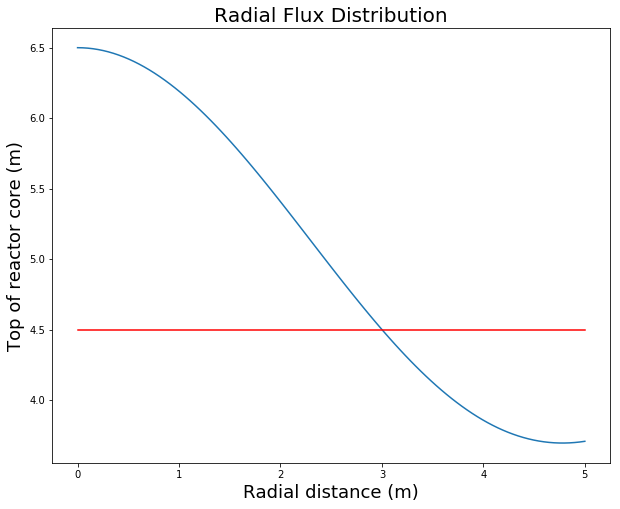

In [24]:
def radial(A,R,r):
    return A*scipy.special.j0((2.405*r)/R)

r=np.linspace(0,5,100)
plt.figure(figsize=(10,8))
plt.plot(r,radial(2,3,r)+4.5)
plt.plot(np.linspace(0,5,100),np.linspace(4.5,4.5,100),c='r')
plt.xlabel('Radial distance (m)',size=18)
plt.ylabel('Top of reactor core (m)',size=18)
plt.title('Radial Flux Distribution',size=20)
plt.show()

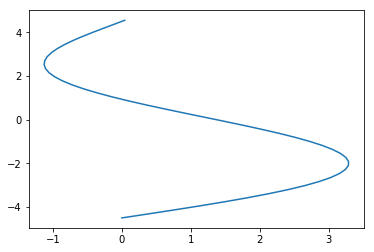

In [21]:
def total_flux(C,A,R,H,r,z):
    return A*scipy.special.j0((2.405*r)/R)*C*np.cos((np.pi*z)/H)

r=np.linspace(0,5,50)
distance = np.linspace(-4.5,4.55,50)
plt.plot(total_flux(3,2,3,9,r,distance),distance)
plt.show()

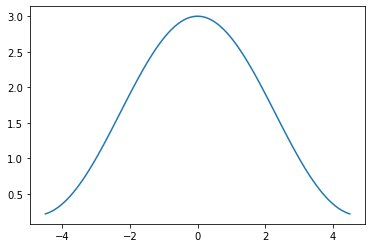

total: 14.896187192078589
section: 0.0


In [232]:
from sklearn.metrics import auc

def radial(A,R,r):
    return A*scipy.special.j0((2.405*r)/R)

r=np.linspace(-4.5,4.5,100)
plt.plot(r,radial(2,3,r)+1)
plt.show()

print('total:',auc(r,radial(2,3,r)+1))
total = np.linspace(-4.5,4.5,100)-4.5
percentage = []
for i in np.linspace(-4.5,4.5,100):
    r=np.linspace(i,4.5,100)
    a = auc(r,radial(2,3,r)+1)*100
    percentage.append(a/14.896187192078589) 
print('section:',auc(r,radial(2,3,r)+1))


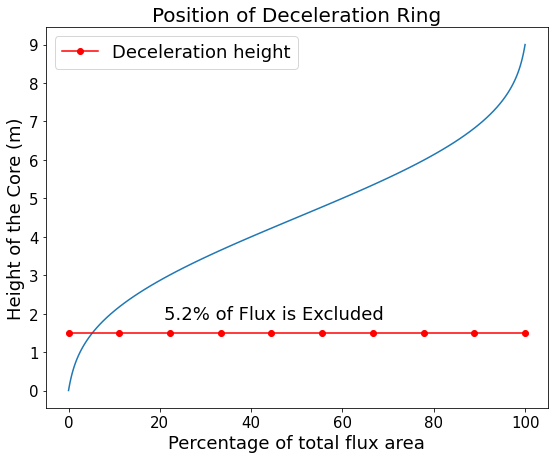

In [236]:
plt.figure(figsize=(9,7))
plt.plot(percentage,-total)
plt.plot(np.linspace(0,100,10),np.linspace(1.5,1.5,10),c='r',label="Deceleration height", marker='o')
plt.xlabel('Percentage of total flux area',size=18)
plt.ylabel('Height of the Core (m)',size=18)
plt.title('Position of Deceleration Ring',size=20)
plt.locator_params(axis='y', nbins=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc=2, prop={'size': 18})
plt.text(45, 2, '5.2% of Flux is Excluded', horizontalalignment='center',verticalalignment='center',size=18)
plt.show()

# Fault Detection with Neural Network 

In [100]:
print(np.linspace(0.2,1.8,10))

[0.2        0.37777778 0.55555556 0.73333333 0.91111111 1.08888889
 1.26666667 1.44444444 1.62222222 1.8       ]


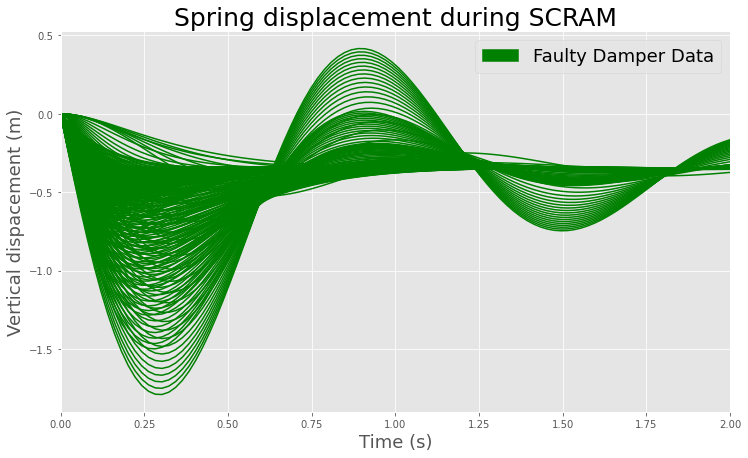

In [149]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

matrix=[] #define empty matrix 
for i in range(400): #total row is 3
    row=[] #Credits for Hassan Tariq for noticing it missing
    for j in range(1): #total column is 3
        row.append(0) #adding 0 value for each column for this row
    matrix.append(row) #add fully defined column into the row
#Constants
g = 9.81

#Mass of the control rod 
ri = 0.0675
ro = 0.075
length = 9
density = 2520 #kg/m3 = (g/cm3)*1000
mass = (ro**2-ri**2)*length*density*np.pi + 135
mass2 = 26.5 #mass of deceleration ring 

# Important Info
#Normal Operation 

#stiff = [6000]
#drop_height = np.linspace(0,7.5,400)
#zeta_list = np.linspace(0.99,0.99,1)

#Spring broken 

#stiff = np.linspace(1000,10000,20)
#drop_height = np.linspace(0,7.5,20)
#zeta_list = np.linspace(0.99,0.99,1)

#Damping broken 

stiff = np.linspace(6000,6000,1)
drop_height = np.linspace(0,7.5,20)
zeta_list = np.linspace(0.2,3,20)

plt.figure(figsize=(12,7))
counter = 0
k_count = 0

for i in range(len(stiff)):
    for j in drop_height:
        zeta_counter = 0
        for d in range(len(zeta_list)):
            
            #Velocity of control rod at bottom after fall
            fall_height = j
            zeta = zeta_list[zeta_counter]
            k= stiff[k_count] #N/m
            #v1 = np.sqrt(2*g*fall_height)
            v1=0 # initial downward velocity
            velocity_bottom = -np.sqrt(v1**2+2*g*fall_height)
            velocity_combined = (mass*velocity_bottom)/(mass+mass2)

            #Particular solution 
            Xp = (g*mass)/k

            #Equations
            c = zeta*2*np.sqrt(k*mass)
            #c = 6000
            time = np.linspace(0,2,100)
            Natural_freq = np.sqrt(k/(mass))
            if zeta <= 1:
                Damped_freq = Natural_freq*np.sqrt(1-zeta**2)
            else:
                Damped_freq = Natural_freq*np.sqrt(zeta**2-1)
            A1 = Xp
            A2 = (velocity_combined+zeta*Natural_freq*A1)/Damped_freq
            Displacement = (np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+A2*np.sin(Damped_freq*time)) - Xp

            Velocity = -zeta*Natural_freq*(np.e**(-zeta*Natural_freq*time))*(A1*np.cos(Damped_freq*time)+
                        A2*np.sin(Damped_freq*time))+ (np.e**(-zeta*Natural_freq*time))*(-Damped_freq*A1*np.sin(Damped_freq*time)+
                                                                     Damped_freq*A2*np.cos(Damped_freq*time))

            plt.plot(time,Displacement,label='Non-faulty Class',c='g')
            matrix[counter] = list(Displacement)
            counter = counter + 1
            zeta_counter = zeta_counter + 1
    k_count = k_count+1
time_series1 = np.array(matrix)
plt.xlabel('Time (s)',size=18)
plt.ylabel('Vertical dispacement (m)',size=18)
plt.title('Spring displacement during SCRAM',size=25)
plt.xlim(0,2)
red_patch = mpatches.Patch(color='g', label='Faulty Damper Data',linestyle='-')
plt.legend(loc=1,fontsize=18,handles=[red_patch])
plt.show()


In [118]:
from itertools import chain

a = list(np.linspace(0,0,400))
b = list(np.linspace(1,1,400))
c = list(np.linspace(2,2,400))

Class = list(chain(a,b,c))
print(Class)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [130]:
Class

x = pd.DataFrame(time_series1)
y = pd.DataFrame(time_series2)
z = pd.DataFrame(time_series3)

time_series = pd.concat([x,y,z])
print(time_series)

      0         1         2         3         4         5         6   \
0    0.0 -0.001865 -0.006955 -0.014596 -0.024221 -0.035346 -0.047569   
1    0.0 -0.011663 -0.024566 -0.038338 -0.052667 -0.067297 -0.082018   
2    0.0 -0.015721 -0.031861 -0.048172 -0.064450 -0.080532 -0.096288   
3    0.0 -0.018835 -0.037459 -0.055718 -0.073491 -0.090687 -0.107237   
4    0.0 -0.021460 -0.042178 -0.062079 -0.081114 -0.099249 -0.116468   
5    0.0 -0.023773 -0.046336 -0.067684 -0.087829 -0.106791 -0.124600   
6    0.0 -0.025864 -0.050094 -0.072751 -0.093900 -0.113610 -0.131952   
7    0.0 -0.027787 -0.053551 -0.077411 -0.099483 -0.119881 -0.138713   
8    0.0 -0.029577 -0.056768 -0.081748 -0.104680 -0.125718 -0.145007   
9    0.0 -0.031258 -0.059790 -0.085821 -0.109560 -0.131200 -0.150917   
10   0.0 -0.032848 -0.062648 -0.089674 -0.114176 -0.136385 -0.156508   
11   0.0 -0.034360 -0.065366 -0.093338 -0.118567 -0.141316 -0.161825   
12   0.0 -0.035805 -0.067963 -0.096839 -0.122762 -0.146028 -0.16

In [135]:
%%time
from __future__ import print_function
 
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(813306)
  
nb_epochs = 100

#fname = each
#x = dfA.iloc[:,1:]
#y = dfA.iloc[:,0]
x = np.array(time_series)
y = np.array(Class)

x_train = x[::3]
y_train = y[::3]
x_test = x[1::3]
y_test = y[1::3]
x_real = x[2::3]
y_real = y[2::3]


#train,validation and testing sets
nb_classes =len(np.unique(y_test))
y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)
nb_classes_real =len(np.unique(y_real))
y_real = (y_real - y_real.min())/(y_real.max()-y_real.min())*(nb_classes_real-1)
batch_size = 16

Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)
Y_real = keras.utils.to_categorical(y_real, nb_classes_real)

x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_train_mean)/(x_train_std)
x_real = (x_real - x_train_mean)/(x_train_std)


x = keras.layers.Input(x_train.shape[1:])
y= keras.layers.Dropout(0.1)(x)
y = keras.layers.Dense(500, activation='tanh')(y)
y = keras.layers.Dropout(0.1)(y)
y = keras.layers.Dense(500, activation='relu')(y)
y = keras.layers.Dropout(0.1)(y)
y = keras.layers.Dense(500, activation = 'relu')(y)
y = keras.layers.Dropout(0.1)(y)
out = keras.layers.Dense(nb_classes, activation='softmax')(y)

model = keras.models.Model(inputs=x, outputs=out)

optimizer = keras.optimizers.Adamax()   
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=200, min_lr=0.1)

hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(x_test, Y_test), 
            #callbacks = [TestCallback((x_train, Y_train)), reduce_lr, keras.callbacks.TensorBoard(log_dir='./log'+fname, histogram_freq=1)])
             callbacks=[reduce_lr])
model.summary()
#testing set
eva = model.evaluate(x_real,Y_real)

Train on 400 samples, validate on 400 samples
Epoch 1/100
400/400 [==============================] - 1s 3ms/sample - loss: 0.7933 - acc: 0.6900 - val_loss: 0.5645 - val_acc: 0.7925
Epoch 2/100
400/400 [==============================] - 0s 975us/sample - loss: 0.5575 - acc: 0.7800 - val_loss: 0.4744 - val_acc: 0.8175
Epoch 3/100
400/400 [==============================] - 0s 941us/sample - loss: 0.5233 - acc: 0.8000 - val_loss: 0.5305 - val_acc: 0.7875
Epoch 4/100
400/400 [==============================] - 0s 956us/sample - loss: 0.4453 - acc: 0.8500 - val_loss: 0.4189 - val_acc: 0.7925
Epoch 5/100
400/400 [==============================] - 0s 984us/sample - loss: 0.3755 - acc: 0.8600 - val_loss: 0.2882 - val_acc: 0.8950
Epoch 6/100
400/400 [==============================] - 0s 975us/sample - loss: 0.3646 - acc: 0.8725 - val_loss: 0.2535 - val_acc: 0.9200
Epoch 7/100
400/400 [==============================] - 0s 983us/sample - loss: 0.3635 - acc: 0.8600 - val_loss: 0.2791 - val_acc: 0.91

Epoch 60/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2213 - acc: 0.9250 - val_loss: 0.1829 - val_acc: 0.9375
Epoch 61/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2071 - acc: 0.9275 - val_loss: 0.1540 - val_acc: 0.9500
Epoch 62/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2353 - acc: 0.9350 - val_loss: 0.1451 - val_acc: 0.9500
Epoch 63/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2059 - acc: 0.9250 - val_loss: 0.1605 - val_acc: 0.9650
Epoch 64/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2232 - acc: 0.9400 - val_loss: 0.1475 - val_acc: 0.9475
Epoch 65/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2514 - acc: 0.9225 - val_loss: 0.1483 - val_acc: 0.9575
Epoch 66/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.2197 - acc: 0.9375 - val_loss: 0.1407 - val_acc: 0.9450
Epoch 67/100
400/400 [==========================

<Figure size 432x288 with 0 Axes>

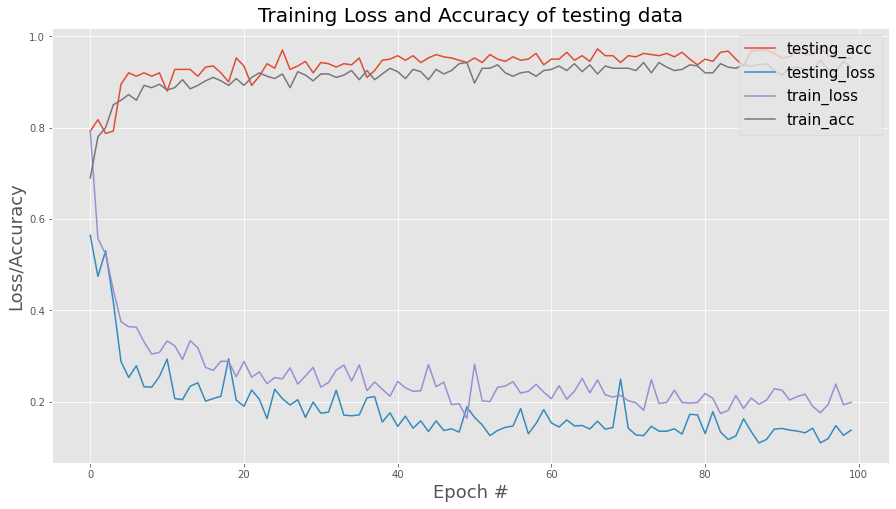

In [136]:
from matplotlib import pyplot as plt

N = np.arange(0, nb_epochs)[:]
H = hist
plt.style.use("ggplot")
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(N, H.history['val_acc'][:], label="testing_acc")
plt.plot(N, H.history["val_loss"][:], label="testing_loss")
plt.plot(N, H.history["loss"][:], label="train_loss")
plt.plot(N, H.history["acc"][:], label="train_acc")
plt.title("Training Loss and Accuracy of testing data",size=20)
plt.xlabel("Epoch #",size=18)
plt.ylabel("Loss/Accuracy",size=18)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [152]:
#for time series  

pred=model.predict(x_train[:])
import numpy as np
total_probability = 0
for i in range(len(pred)):
    if y_test[:][i] == np.argmax(pred[i]):
        argument = np.argmax(pred[i])
        value = pred[i][argument]
        total_probability = total_probability + value
prob_accuracy = total_probability/len(pred)
print(prob_accuracy)

0.8946044836938382
